In [50]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = int(x)
        self.y = int(y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __ne__(self, other):
        return not self.__eq__(other)

In [51]:
pathToMap = 'build/map.txt'

import csv
with open(pathToMap, 'rb') as csvfile:
    map = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
for col in range(len(map)):
    for row in range(len(map[col])):
        map[col-1][row-1] = int(map[col-1][row-1])

In [52]:
pathToPath = 'build/path.txt'
with open(pathToPath,'rb') as csvfile:
    path = list(csv.reader(csvfile,delimiter=','))
start = Point(path[1][1],path[1][2])
second = Point(path[2][1],path[2][2])
end = Point(path[-1][1],path[-1][2])
print("Start: "+`start`)
print("End: "+`end`)

Start: <__main__.Point instance at 0x11030cb00>
End: <__main__.Point instance at 0x11025edd0>


Next we can define an implementation of A* in order to find the fastest route from start to end
<pre>
function A*(start, goal)
    // The set of nodes already evaluated.
    closedSet := {}
    // The set of currently discovered nodes still to be evaluated.
    // Initially, only the start node is known.
    openSet := {start}
    // For each node, which node it can most efficiently be reached from.
    // If a node can be reached from many nodes, cameFrom will eventually contain the
    // most efficient previous step.
    cameFrom := the empty map

    // For each node, the cost of getting from the start node to that node.
    gScore := map with default value of Infinity
    // The cost of going from start to start is zero.
    gScore[start] := 0 
    // For each node, the total cost of getting from the start node to the goal
    // by passing by that node. That value is partly known, partly heuristic.
    fScore := map with default value of Infinity
    // For the first node, that value is completely heuristic.
    fScore[start] := heuristic_cost_estimate(start, goal)

    while openSet is not empty
        current := the node in openSet having the lowest fScore[] value
        if current = goal
            return reconstruct_path(cameFrom, goal)

        openSet.Remove(current)
        closedSet.Add(current)
        for each neighbor of current
            if neighbor in closedSet
                continue		// Ignore the neighbor which is already evaluated.
            // The distance from start to a neighbor
            tentative_gScore := gScore[current] + dist_between(current, neighbor)
            if neighbor not in openSet	// Discover a new node
                openSet.Add(neighbor)
            else if tentative_gScore >= gScore[neighbor]
                continue		// This is not a better path.

            // This path is the best until now. Record it!
            cameFrom[neighbor] := current
            gScore[neighbor] := tentative_gScore
            fScore[neighbor] := gScore[neighbor] + heuristic_cost_estimate(neighbor, goal)

    return failure

function reconstruct_path(cameFrom, current)
    total_path := [current]
    while current in cameFrom.Keys:
        current := cameFrom[current]
        total_path.append(current)
    return total_path
    </pre>

In [55]:
import sys
from itertools import izip
INFINITY = sys.maxint
xWidth = len(map)
yHeight = len(map[0])
def Distance(start,end):
    return abs(start.x-end.x)+abs(start.y-end.y)

def ReplayPath(cameFrom,current,start):
    total_path = [current]
    pos = current
    print("x: "+ `pos.x`+" y: "+`pos.y`) 
    while not pos == start:
        pos = cameFrom[pos.x][pos.y]
        total_path.append(pos)
        print("x: "+ `pos.x`+" y: "+`pos.y`) 
    return total_path

def AStar(map,start,end):

    #The set of nodes already evaluated.
    visitedNodes = []
    #The set of currently discovered nodes still to be evaluated.
    #Initially, only the start node is known.
    discoveredNodes = [start]
    #For each node, which node it can most efficiently be reached from.
    #If a node can be reached from many nodes, cameFrom will eventually contain the
    #most efficient previous step.
    previousposition = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    gscore = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    fscore = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    visitedNodeMap = [[False for y in range(yHeight)] for x in range(xWidth)] 
    discoveredNodeMap = [[False for y in range(yHeight)] for x in range(xWidth)] 
    for col in range(xWidth):
        for row in range(len(map[col])):
            gscore[col-1][row-1] = INFINITY
            fscore[col-1][row-1] = INFINITY
    gscore[start.x][start.y] = 0
    fscore[start.x][start.y] = Distance(start, end)
    while(len(discoveredNodes)>0):
        lowest = fscore[discoveredNodes[0].x][discoveredNodes[0].y]
        lowestIndex = 0
        for indx in range(1,len(discoveredNodes)-1):
            score = fscore[discoveredNodes[indx].x][discoveredNodes[indx].y]
            if (lowest > score):
                lowest = score
                lowestIndex = indx
        currentNode = discoveredNodes[lowestIndex]
        if (currentNode == end):
            return(ReplayPath(previousposition,end,start))
            #output path
        discoveredNodes.remove(currentNode)
        visitedNodes.append(currentNode)
        visitedNodeMap[currentNode.x][currentNode.y] = True
        points = [Point(max(currentNode.x-1,0),currentNode.y),
                  Point(min(xWidth-1,currentNode.x+1),currentNode.y),
                  Point(currentNode.x,min(currentNode.y+1,yHeight-1)),
                  Point(currentNode.x,max(currentNode.y-1,0))]
        for point in points:
            if visitedNodeMap[point.x][point.y] == False:
                # The distance from start to a neighbor
                #print("x: "+ `point.x`+" y: "+`point.y`) 
                newGScore = gscore[currentNode.x][currentNode.y] + map[point.x][point.y]
                if discoveredNodeMap[point.x][point.y] == False:
                    discoveredNodeMap[point.x][point.y] = True
                    discoveredNodes.append(point)
                if newGScore < gscore[point.x][point.y]:
                    previousposition[point.x][point.y] = currentNode
                    gscore[point.x][point.y] = newGScore
                    fscore[point.x][point.y] = newGScore + Distance(point, end)
    raise LookupError("Could not find solution")
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()

print("Finding route from 1 to 2")
a = AStar(map,start,second)
print("Finding route from 1 to last")
b = AStar(map,start,end)
print("Finding route from top left to bottom right")
c = AStar(map,Point(0,0),Point(xWidth-1,yHeight-1))

pr.disable()
s = StringIO.StringIO()
sortby = 'cumulative'
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print s.getvalue()

Finding route from 1 to 2
x: 64 y: 8
x: 64 y: 9
x: 64 y: 10
x: 64 y: 11
x: 63 y: 11
x: 63 y: 12
x: 63 y: 13
x: 63 y: 14
x: 64 y: 14
x: 64 y: 15
x: 64 y: 16
x: 65 y: 16
x: 65 y: 17
x: 65 y: 18
x: 65 y: 19
x: 66 y: 19
x: 66 y: 20
x: 67 y: 20
x: 68 y: 20
x: 68 y: 21
x: 68 y: 22
x: 68 y: 23
x: 69 y: 23
x: 69 y: 24
x: 69 y: 25
x: 69 y: 26
x: 69 y: 27
x: 70 y: 27
x: 71 y: 27
x: 71 y: 28
x: 71 y: 29
x: 72 y: 29
x: 72 y: 30
x: 72 y: 31
x: 73 y: 31
x: 73 y: 32
x: 74 y: 32
x: 74 y: 33
x: 74 y: 34
x: 74 y: 35
x: 74 y: 36
x: 75 y: 36
x: 75 y: 37
x: 75 y: 38
x: 76 y: 38
x: 76 y: 39
x: 76 y: 40
x: 76 y: 41
x: 76 y: 42
x: 76 y: 43
x: 76 y: 44
x: 77 y: 44
x: 77 y: 45
x: 77 y: 46
x: 77 y: 47
x: 77 y: 48
x: 77 y: 49
x: 78 y: 49
x: 78 y: 50
x: 78 y: 51
x: 78 y: 52
x: 79 y: 52
x: 79 y: 53
x: 79 y: 54
x: 79 y: 55
x: 80 y: 55
x: 80 y: 56
x: 81 y: 56
x: 81 y: 57
x: 81 y: 58
x: 82 y: 58
x: 82 y: 59
x: 82 y: 60
x: 82 y: 61
x: 82 y: 62
x: 82 y: 63
x: 81 y: 63
Finding route from 1 to last
x: 77 y: 39
x: 77 y: 40

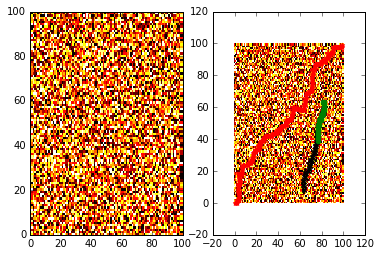

In [58]:
%matplotlib inline
def column(matrix, i):
    return [row[i] for row in matrix]
import numpy as np
import matplotlib.pyplot as plt
xa = np.array([row.x for row in a])
ya = np.array([row.y for row in a])
xb = np.array([row.x for row in b])
yb = np.array([row.y for row in b])
xc = np.array([row.x for row in c])
yc = np.array([row.y for row in c])
plt.subplot(1,2, 1)
heatmap = plt.pcolor(map,cmap='hot')
plt.subplot(1, 2, 2)
plt.pcolor(map,cmap='hot')
plt.scatter(xa, ya,marker='x',color='k')
plt.scatter(xb, yb,marker='o',color='g')
plt.scatter(xc, yc,marker='*',color='r')
plt.show()
